# Data Extraction

* [Source of dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

## (0) Import Library & Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
customerData = pd.read_csv('dataset\marketing_campaign.csv',sep='\t')

In [3]:
customerData

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Data Cleaning

## (0) Preparation

We copy the dataset before doing cleaning.

In [7]:
customerData_Clean = customerData.copy()

## (1) Data Cleaning: Removing NULL Data in Income Column (Using Median)

In [6]:
check = customerData_Clean[customerData_Clean["Income"].isnull() == True]
print(check.index)
print(len(check.index))

Int64Index([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,
             312,  319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081,
            2084, 2228],
           dtype='int64')
24


After checking the number of NULL data, we decide to remove it because 

## (1) Data Cleaning: Adding columns - Grocery Products, Total Purchase, Year Distribution

In [5]:
customerData_Clean.loc[:,'MntGroceryProducts'] = customerData_Clean['MntMeatProducts'] + customerData_Clean['MntFishProducts'] + customerData_Clean['MntFruits']
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,806
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,9
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,287
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,34
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,267
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,30
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,297
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,324


In [6]:
customerData_Clean.loc[:,'TotalPurchase'] = customerData_Clean['NumDealsPurchases'] + customerData_Clean['NumWebPurchases'] + customerData_Clean['NumCatalogPurchases'] + customerData_Clean['NumStorePurchases']
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,806,25
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,9,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,287,21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,34,8
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,207,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,267,18
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,30,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,297,19
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,324,23


In [7]:
customerData_Clean.loc[:,'AcceptedCmp'] = customerData_Clean['AcceptedCmp1'] + customerData_Clean['AcceptedCmp2'] + customerData_Clean['AcceptedCmp3'] + customerData_Clean['AcceptedCmp4'] + customerData_Clean['AcceptedCmp5'] + customerData_Clean['Response']
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase,AcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,806,25,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,9,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,287,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,34,8,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,207,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,267,18,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,30,22,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,297,19,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,324,23,0


In [8]:
customerData_Clean['YearRange'] = customerData_Clean["Year_Birth"] / 10
customerData_Clean['YearRange'] = customerData_Clean['YearRange'].astype("int64")
customerData_Clean['YearRange'] = customerData_Clean["YearRange"] * 10
customerData_Clean['YearRange'] = customerData_Clean['YearRange'].astype("category")
customerData_Clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,806,25,1,1950
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,9,6,0,1950
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,287,21,0,1960
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,34,8,0,1980
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,207,19,0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,3,11,0,267,18,0,1960
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,1,0,0,3,11,0,30,22,1,1940
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,3,11,0,297,19,1,1980
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,3,11,0,324,23,0,1950


In [9]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   object  
 3   Marital_Status       2240 non-null   object  
 4   Income               2216 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

## (2) Data Cleaning: Remove column ID, Z_CostContact, Z_Revenue, Campaign Related   Variable

In [10]:
dropColumn = ["ID","Z_CostContact","Z_Revenue","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
customerData_Clean.drop(dropColumn,inplace= True,axis = 1)

In [11]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2240 non-null   int64   
 1   Education            2240 non-null   object  
 2   Marital_Status       2240 non-null   object  
 3   Income               2216 non-null   float64 
 4   Kidhome              2240 non-null   int64   
 5   Teenhome             2240 non-null   int64   
 6   Dt_Customer          2240 non-null   object  
 7   Recency              2240 non-null   int64   
 8   MntWines             2240 non-null   int64   
 9   MntFruits            2240 non-null   int64   
 10  MntMeatProducts      2240 non-null   int64   
 11  MntFishProducts      2240 non-null   int64   
 12  MntSweetProducts     2240 non-null   int64   
 13  MntGoldProds         2240 non-null   int64   
 14  NumDealsPurchases    2240 non-null   int64   
 15  NumWebPurchases      

## (3) Data Cleaning: Change Data Types 

(a) Notedown which column are categorical data/ numerical data

In [12]:
colOfNum = []
colOfCat = []
for col in customerData_Clean:
    if str(customerData_Clean[col].dtypes) != "int64" and str(customerData_Clean[col].dtypes) != "float64":
        colOfCat.append(str(col))
    else:
        colOfNum.append(str(col))
        
colOfCat.extend(['Kidhome','Teenhome','Complain'])

for element in ['Kidhome','Teenhome','Complain']:
    colOfNum.remove(element)
    
print("Column which consider as Numerical Data:\n", colOfNum)
print()
print("Column which consider as Categorical Data:\n",colOfCat)

Column which consider as Numerical Data:
 ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntGroceryProducts', 'TotalPurchase', 'AcceptedCmp']

Column which consider as Categorical Data:
 ['Education', 'Marital_Status', 'Dt_Customer', 'YearRange', 'Kidhome', 'Teenhome', 'Complain']


(b) Convert the columns to category

In [13]:
for data in colOfCat:
    customerData_Clean[data] = customerData_Clean[data].astype("category")

In [14]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2240 non-null   int64   
 1   Education            2240 non-null   category
 2   Marital_Status       2240 non-null   category
 3   Income               2216 non-null   float64 
 4   Kidhome              2240 non-null   category
 5   Teenhome             2240 non-null   category
 6   Dt_Customer          2240 non-null   category
 7   Recency              2240 non-null   int64   
 8   MntWines             2240 non-null   int64   
 9   MntFruits            2240 non-null   int64   
 10  MntMeatProducts      2240 non-null   int64   
 11  MntFishProducts      2240 non-null   int64   
 12  MntSweetProducts     2240 non-null   int64   
 13  MntGoldProds         2240 non-null   int64   
 14  NumDealsPurchases    2240 non-null   int64   
 15  NumWebPurchases      

## (4) Data Cleaning: Cleaning Marital Status 

Number of Marital_Status: 8
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


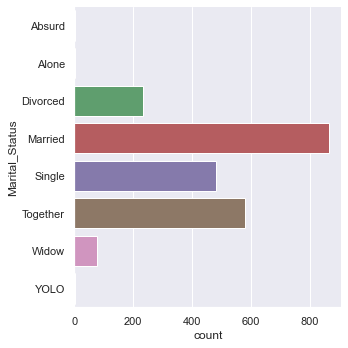

In [15]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Marital_Status:", len(customerData_Clean["Marital_Status"].unique()))

# Pokemons in each Generation
print(customerData_Clean["Marital_Status"].value_counts())
sb.catplot(y = "Marital_Status", data = customerData_Clean, kind = "count")

#### (a) Remove Strange Response - Absurd and YOLO 

In [16]:
deleteData = customerData_Clean.loc[(customerData_Clean.Marital_Status == "Absurd") | (customerData_Clean.Marital_Status == "YOLO")]
print(deleteData.index.tolist())
customerData_Clean.drop(index = deleteData.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[2093, 2134, 2177, 2202]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,3,8,10,4,7,0,806,25,1,1950
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,1,1,2,5,0,9,6,0,1950
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,1,8,2,10,4,0,287,21,0,1960
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,2,2,0,4,6,0,34,8,0,1980
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,5,3,6,5,0,207,19,0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,2,9,3,4,5,0,267,18,0,1960
2232,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,8,2,5,7,0,30,22,1,1940
2233,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,1,2,3,13,6,0,297,19,1,1980
2234,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,2,6,5,10,3,0,324,23,0,1950


Number of Marital_Status: 6
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        0
YOLO          0
Name: Marital_Status, dtype: int64


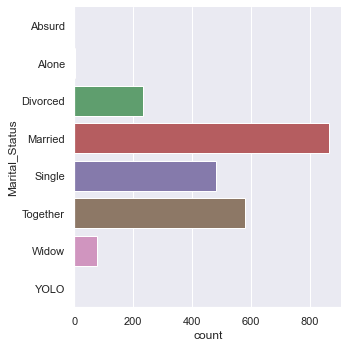

In [17]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Marital_Status:", len(customerData_Clean["Marital_Status"].unique()))

# Pokemons in each Generation
print(customerData_Clean["Marital_Status"].value_counts())
sb.catplot(y = "Marital_Status", data = customerData_Clean, kind = "count")

#### (b) Combine Alone + Single, Married + Together, Widow + Divorced

Number of Marital_Status: 3
Married     1444
Single       483
Divorced     309
Name: Marital_Status, dtype: int64


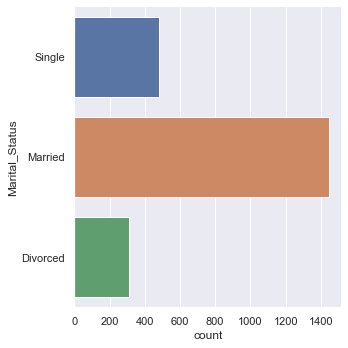

In [18]:
customerData_Clean = customerData_Clean.replace({'Marital_Status': {'Alone': 'Single','Together': 'Married','Widow': 'Divorced'}})
print("Number of Marital_Status:", len(customerData_Clean["Marital_Status"].unique()))

# Pokemons in each Generation
print(customerData_Clean["Marital_Status"].value_counts())
sb.catplot(y = "Marital_Status", data = customerData_Clean, kind = "count")

## (5) Data Cleaning: Create new variable: HaveKids based on KidHome, TeenHome

Number of Kidhome: 3
0    1289
1     899
2      48
Name: Kidhome, dtype: int64


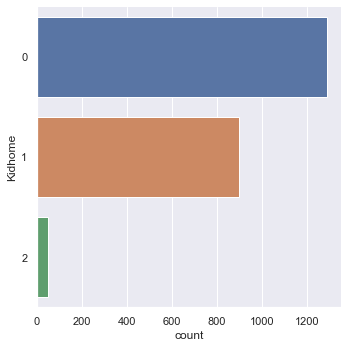

In [19]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Kidhome:", len(customerData_Clean["Kidhome"].unique()))

# Pokemons in each Generation
print(customerData_Clean["Kidhome"].value_counts())
sb.catplot(y = "Kidhome", data = customerData_Clean, kind = "count")

Number of Teenhome: 3
0    1156
1    1028
2      52
Name: Teenhome, dtype: int64


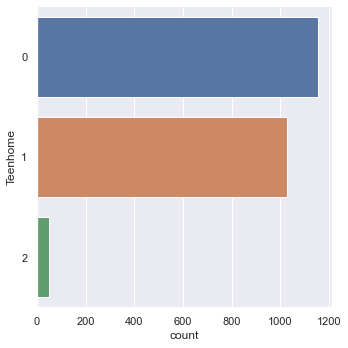

In [20]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Teenhome:", len(customerData_Clean["Teenhome"].unique()))

# Pokemons in each Generation
print(customerData_Clean["Teenhome"].value_counts())
sb.catplot(y = "Teenhome", data = customerData_Clean, kind = "count")

#### (a) Creating new variable: TotalChild
    This indicates how many children one family are having.

In [21]:
customerData_Clean.loc[:,'TotalChild'] = customerData_Clean['Kidhome'].astype("int64") + customerData_Clean['Teenhome'].astype("int64")
customerData_Clean

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,8,10,4,7,0,806,25,1,1950,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,1,2,5,0,9,6,0,1950,2
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,8,2,10,4,0,287,21,0,1960,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,2,0,4,6,0,34,8,0,1980,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,3,6,5,0,207,19,0,1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,9,3,4,5,0,267,18,0,1960,1
2232,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,8,2,5,7,0,30,22,1,1940,3
2233,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,2,3,13,6,0,297,19,1,1980,0
2234,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,6,5,10,3,0,324,23,0,1950,1


Number of TotalChild: 4
1    1126
0     636
2     421
3      53
Name: TotalChild, dtype: int64


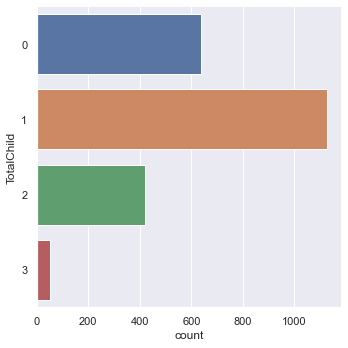

In [22]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of TotalChild:", len(customerData_Clean["TotalChild"].unique()))

# Pokemons in each Generation
print(customerData_Clean["TotalChild"].value_counts())
sb.catplot(y = "TotalChild", data = customerData_Clean, kind = "count")

#### (b) Creating new variable: HaveChild
    This indicates whether the family have children.

In [23]:
customerData_Clean.loc[:,'HaveChild'] = customerData_Clean["TotalChild"]
customerData_Clean = customerData_Clean.replace({'HaveChild': {2: 1,3: 1}})
customerData_Clean

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,806,25,1,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,9,6,0,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,287,21,0,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,34,8,0,1980,1,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,267,18,0,1960,1,1
2232,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,30,22,1,1940,3,1
2233,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,297,19,1,1980,0,0
2234,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,324,23,0,1950,1,1


Number of HaveChild: 2
1    1600
0     636
Name: HaveChild, dtype: int64


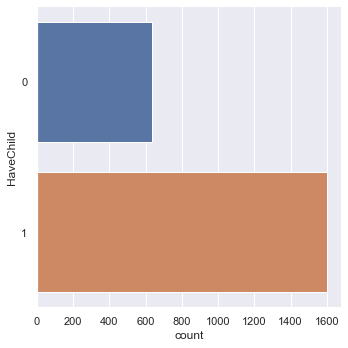

In [24]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of HaveChild:", len(customerData_Clean["HaveChild"].unique()))

# Pokemons in each Generation
print(customerData_Clean["HaveChild"].value_counts())
sb.catplot(y = "HaveChild", data = customerData_Clean, kind = "count")

## (6) Data Cleaning: Remove Outliers of Year Range

Number of YearRange: 8
1970    738
1960    506
1950    459
1980    363
1940    107
1990     60
1890      2
1900      1
Name: YearRange, dtype: int64


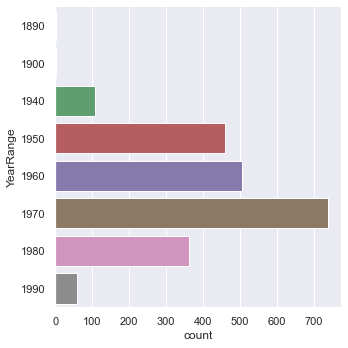

In [25]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of YearRange:", len(customerData_Clean["YearRange"].unique()))

# Pokemons in each Generation
print(customerData_Clean["YearRange"].value_counts())
sb.catplot(y = "YearRange", data = customerData_Clean, kind = "count")

In [26]:
deleteData = customerData_Clean.loc[(customerData_Clean.YearRange == 1890) | (customerData_Clean.YearRange == 1900)]
print(deleteData.index.tolist())
customerData_Clean.drop(index = deleteData.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[192, 239, 339]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,806,25,1,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,9,6,0,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,287,21,0,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,34,8,0,1980,1,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,267,18,0,1960,1,1
2229,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,30,22,1,1940,3,1
2230,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,297,19,1,1980,0,0
2231,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,324,23,0,1950,1,1


Number of YearRange: 6
1970    738
1960    506
1950    459
1980    363
1940    107
1990     60
1890      0
1900      0
Name: YearRange, dtype: int64


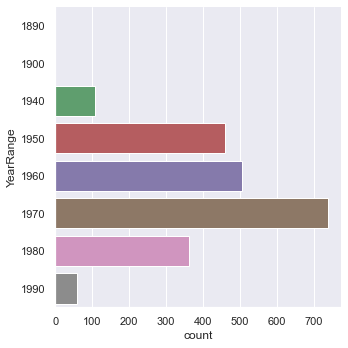

In [27]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of YearRange:", len(customerData_Clean["YearRange"].unique()))

# Pokemons in each Generation
print(customerData_Clean["YearRange"].value_counts())
sb.catplot(y = "YearRange", data = customerData_Clean, kind = "count")

## (7) Data Cleaning: Remove Outliers in Income Column

#### (a) Remove Income Outliers (Top 1 %)

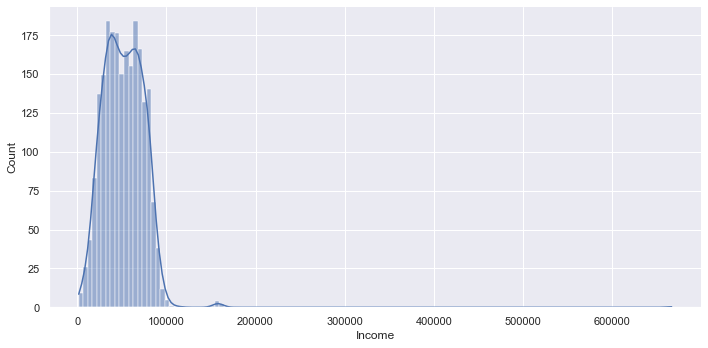

In [28]:
sb.displot(customerData_Clean["Income"], kde = True, aspect = 2)

In [29]:
customerData_Clean["Income"].describe()

count      2209.000000
mean      52221.801720
std       25193.001847
min        1730.000000
25%       35196.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [30]:
customerData_Clean["Income"].quantile(q=0.99)

94464.96

In [31]:
outliers_Income = customerData_Clean[customerData_Clean["Income"] >= customerData_Clean["Income"].quantile(q=0.99)]
outliers_Income

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
124,1983,Graduation,Single,101970.0,0,0,12-03-2013,69,722,27,...,8,13,2,0,173,27,4,1980,0,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,22,0,0,0,1585,37,0,1970,1,1
202,1977,PhD,Married,102160.0,0,0,02-11-2012,54,763,29,...,9,10,4,0,243,26,4,1970,0,0
250,1974,Graduation,Divorced,102692.0,0,0,05-04-2013,5,168,148,...,9,13,2,0,624,29,5,1970,0,0
614,1976,PhD,Married,162397.0,1,1,03-06-2013,31,85,1,...,0,1,1,0,19,1,0,1970,2,1
643,1970,Graduation,Married,105471.0,0,0,21-01-2013,36,1009,181,...,8,13,3,0,487,30,3,1970,0,0
647,1960,Master,Single,98777.0,0,0,17-02-2014,23,1000,19,...,6,9,1,0,855,19,1,1960,0,0
652,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,0,0,0,3,0,0,1970,0,0
684,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,28,1,0,0,1655,44,0,1980,0,0
911,1994,Graduation,Single,95529.0,0,0,03-12-2012,29,770,29,...,3,7,3,0,1169,18,2,1990,0,0


In [32]:
print(outliers_Income.index.tolist())
customerData_Clean.drop(index = outliers_Income.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[124, 164, 202, 250, 614, 643, 647, 652, 684, 911, 998, 1110, 1297, 1470, 1650, 1895, 1955, 1979, 1990, 1992, 2009, 2128, 2226]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,806,25,1,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,9,6,0,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,287,21,0,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,34,8,0,1980,1,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,267,18,0,1960,1,1
2206,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,30,22,1,1940,3,1
2207,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,297,19,1,1980,0,0
2208,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,324,23,0,1950,1,1


## (8) Data Cleaning: Remove Outliers in MntGroceryProducts Column

<Figure size 144x432 with 0 Axes>

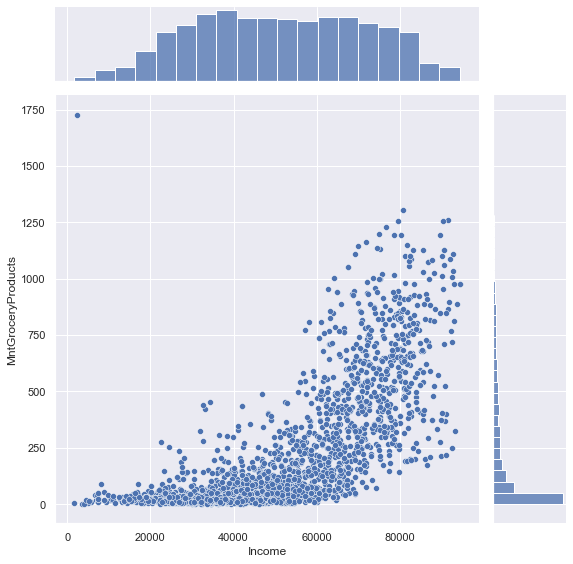

In [33]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGroceryProducts", height = 8)

In [34]:
outliers_Grocery = pd.DataFrame(customerData_Clean[customerData_Clean["MntGroceryProducts"] >= 1500])
outliers_Grocery

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
21,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,1,...,28,0,1,0,1727,43,0,1970,1,1
2199,1978,2n Cycle,Married,NaN,0,0,12-08-2012,53,32,2,...,0,1,0,0,1621,1,1,1970,0,0


In [35]:
print(outliers_Grocery.index.tolist())
customerData_Clean.drop(index = outliers_Grocery.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[21, 2199]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,806,25,1,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,9,6,0,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,287,21,0,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,34,8,0,1980,1,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,267,18,0,1960,1,1
2204,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,30,22,1,1940,3,1
2205,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,297,19,1,1980,0,0
2206,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,324,23,0,1950,1,1


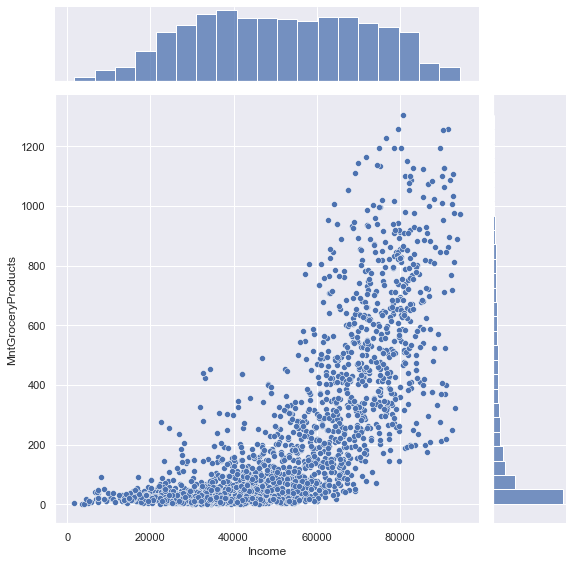

In [36]:
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGroceryProducts", height = 8)

## (9) Data Cleaning: Remove Outliers in MntGoldProducts Column

<Figure size 144x432 with 0 Axes>

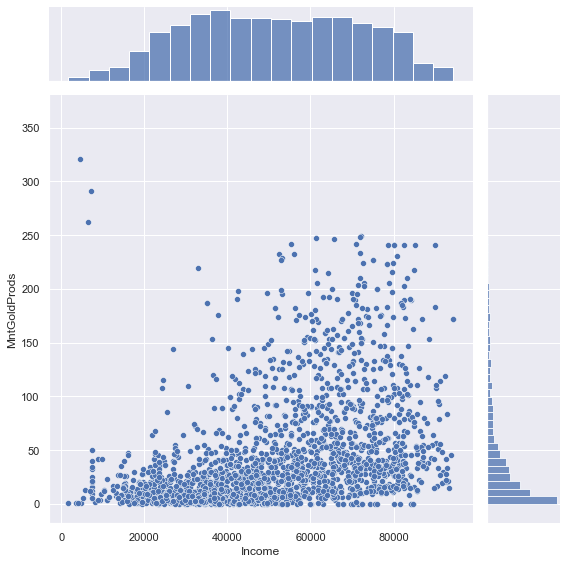

In [37]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGoldProds", height = 8)

In [38]:
outliers_Gold = pd.DataFrame()
outliers_Gold = customerData_Clean.loc[(customerData_Clean.MntGoldProds >= 250) & (customerData_Clean.Income <= 20000)]
outliers_Gold

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
1311,1982,Master,Single,6560.0,0,0,12-12-2013,2,67,11,...,0,1,17,0,41,2,0,1980,0,0
1787,1966,PhD,Single,7144.0,0,2,07-12-2013,92,81,4,...,1,1,0,0,42,25,0,1960,2,1
1954,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,4,...,0,0,1,0,18,25,0,1960,1,1


In [39]:
print(outliers_Gold.index.tolist())
customerData_Clean.drop(index = outliers_Gold.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[1311, 1787, 1954]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,806,25,1,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,9,6,0,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,287,21,0,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,34,8,0,1980,1,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,267,18,0,1960,1,1
2201,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,30,22,1,1940,3,1
2202,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,297,19,1,1980,0,0
2203,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,324,23,0,1950,1,1


<Figure size 144x432 with 0 Axes>

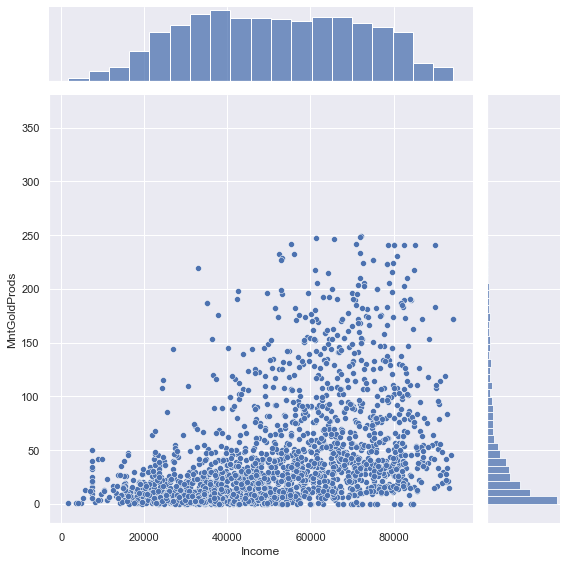

In [40]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGoldProds", height = 8)

In [41]:
outliers_Gold = pd.DataFrame()
outliers_Gold = customerData_Clean.loc[(customerData_Clean.MntGoldProds >= 250)]
outliers_Gold

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
26,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,...,0,0,1,0,7,27,0,1980,1,1


In [42]:
print(outliers_Gold.index.tolist())
customerData_Clean.drop(index = outliers_Gold.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[26]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,806,25,1,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,9,6,0,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,287,21,0,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,34,8,0,1980,1,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,267,18,0,1960,1,1
2200,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,30,22,1,1940,3,1
2201,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,297,19,1,1980,0,0
2202,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,324,23,0,1950,1,1


<Figure size 144x432 with 0 Axes>

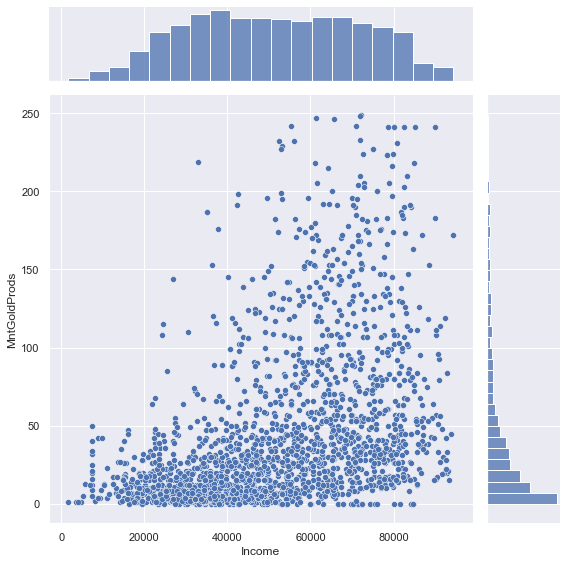

In [43]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_Clean, x = "Income", y = "MntGoldProds", height = 8)

## (10) Data Cleaning: Removing outliers in NumWebVisitsMonth

7     392
8     340
6     339
5     279
4     216
3     203
2     196
1     140
9      83
0       5
20      3
10      3
14      2
19      2
13      1
Name: NumWebVisitsMonth, dtype: int64


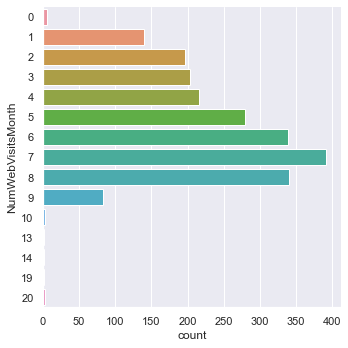

In [44]:
print(customerData_Clean["NumWebVisitsMonth"].value_counts())
sb.catplot(y = "NumWebVisitsMonth", data = customerData_Clean, kind = "count")

In [50]:
outliers_Web = customerData_Clean.loc[(customerData_Clean.NumWebVisitsMonth >= 10) | (customerData_Clean.NumWebVisitsMonth == 0)]
outliers_Web

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
9,1950,PhD,Married,5648.0,1,1,13-03-2014,68,28,0,...,0,0,20,0,7,2,1,1950,2,1
45,1968,Graduation,Married,41728.0,1,0,24-05-2013,92,13,6,...,0,2,10,0,24,5,0,1960,1,1
596,1986,Master,Single,21888.0,1,0,29-12-2012,15,88,10,...,1,2,10,0,58,12,1,1980,1,1
760,1957,PhD,Married,6835.0,0,1,08-12-2012,76,107,2,...,0,1,20,0,16,1,0,1950,1,1
891,1977,Graduation,Single,85072.0,0,0,09-04-2014,94,494,92,...,4,10,0,0,677,18,0,1970,0,0
960,1962,Graduation,Married,83715.0,0,0,03-02-2014,2,318,8,...,8,13,0,0,565,24,0,1960,0,0
966,1965,Graduation,Divorced,4861.0,0,0,22-06-2014,20,2,1,...,0,0,14,0,3,0,0,1960,0,0
1026,1991,Graduation,Single,8028.0,0,0,18-09-2012,62,73,18,...,1,0,19,0,91,16,0,1990,0,0
1228,1971,Graduation,Divorced,1730.0,0,0,18-05-2014,65,1,1,...,0,0,20,0,5,15,0,1970,0,0
1504,1973,Graduation,Single,3502.0,1,0,13-04-2013,56,2,1,...,0,0,14,0,2,0,0,1970,1,1


In [51]:
print(outliers_Web.index.tolist())
customerData_Clean.drop(index = outliers_Web.index.tolist(),inplace=True)
customerData_Clean.reset_index(drop=True, inplace=True)
customerData_Clean

[9, 45, 596, 760, 891, 960, 966, 1026, 1228, 1504, 1752, 1824, 1846, 1887, 1932, 2180]


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,806,25,1,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,9,6,0,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,287,21,0,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,34,8,0,1980,1,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,267,18,0,1960,1,1
2184,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,30,22,1,1940,3,1
2185,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,297,19,1,1980,0,0
2186,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,324,23,0,1950,1,1


7    392
8    340
6    339
5    279
4    216
3    203
2    196
1    140
9     83
Name: NumWebVisitsMonth, dtype: int64


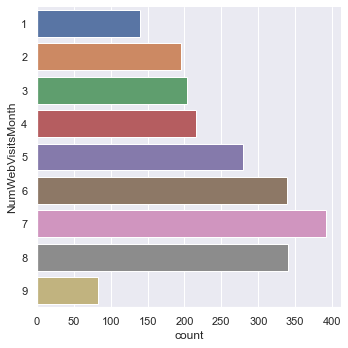

In [63]:
print(customerData_Clean["NumWebVisitsMonth"].value_counts())
sb.catplot(y = "NumWebVisitsMonth", data = customerData_Clean, kind = "count")

In [54]:
check[colOfNum].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,AcceptedCmp
count,22.000000,0.0,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,1966.136364,NaN,60.045455,213.454545,23.136364,104.318182,28.954545,20.818182,36.272727,2.681818,3.181818,2.000000,5.181818,5.500000,156.409091,13.045455,0.272727
std,11.609911,NaN,29.573922,247.104514,39.580293,148.524613,42.712190,32.266209,45.497443,2.661657,2.038589,2.526055,3.017984,2.262531,222.242609,7.599983,0.702500
min,1943.000000,NaN,4.000000,5.000000,0.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,10.000000,4.000000,0.000000
25%,1957.250000,NaN,40.500000,23.500000,1.000000,15.250000,2.000000,0.500000,6.250000,1.000000,1.250000,0.000000,3.000000,4.250000,17.250000,7.250000,0.000000
50%,1966.500000,NaN,68.000000,121.000000,4.500000,35.000000,8.000000,3.000000,16.000000,2.000000,2.500000,1.000000,4.000000,6.000000,48.000000,10.500000,0.000000
75%,1972.750000,NaN,82.750000,330.000000,32.750000,145.250000,46.250000,29.500000,49.500000,3.000000,4.750000,3.000000,7.000000,7.000000,229.000000,18.500000,0.000000
max,1989.000000,NaN,96.000000,861.000000,138.000000,490.000000,164.000000,126.000000,147.000000,12.000000,7.000000,10.000000,12.000000,9.000000,780.000000,29.000000,2.000000


In [55]:
print(customerData_Clean["Income"].quantile())
values = {"Income": customerData_Clean["Income"].quantile()}
customerData_Clean = customerData_Clean.fillna(value=values)

51222.5


In [56]:
customerData_Clean["Income"].describe()

count     2188.000000
mean     51483.184644
std      20025.920179
min       7500.000000
25%      35616.750000
50%      51222.500000
75%      67546.000000
max      94384.000000
Name: Income, dtype: float64

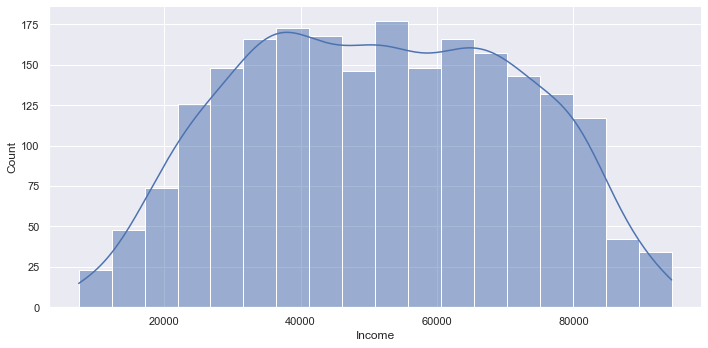

In [57]:
sb.displot(customerData_Clean["Income"], kde = True, aspect = 2)

## Cleaning Done, Details show below:

In [58]:
customerData_Clean

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,806,25,1,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,9,6,0,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,287,21,0,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,34,8,0,1980,1,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,267,18,0,1960,1,1
2184,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,30,22,1,1940,3,1
2185,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,297,19,1,1980,0,0
2186,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,324,23,0,1950,1,1


In [59]:
customerData_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Year_Birth           2188 non-null   int64   
 1   Education            2188 non-null   category
 2   Marital_Status       2188 non-null   object  
 3   Income               2188 non-null   float64 
 4   Kidhome              2188 non-null   category
 5   Teenhome             2188 non-null   category
 6   Dt_Customer          2188 non-null   category
 7   Recency              2188 non-null   int64   
 8   MntWines             2188 non-null   int64   
 9   MntFruits            2188 non-null   int64   
 10  MntMeatProducts      2188 non-null   int64   
 11  MntFishProducts      2188 non-null   int64   
 12  MntSweetProducts     2188 non-null   int64   
 13  MntGoldProds         2188 non-null   int64   
 14  NumDealsPurchases    2188 non-null   int64   
 15  NumWebPurchases      

In [60]:
customerData_Clean[colOfNum].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,AcceptedCmp
count,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000,2188.000000
mean,1968.852834,51483.184644,49.266910,303.828154,26.203839,162.244059,37.091865,26.717093,43.407221,2.319927,4.068099,2.606947,5.825411,5.322212,225.539762,14.820384,0.435558
std,11.686082,20025.920179,28.911119,335.984981,39.543642,212.817373,54.018983,40.393276,50.460178,1.816710,2.618988,2.724004,3.211299,2.252859,275.782652,7.571045,0.871201
min,1940.000000,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,4.000000,0.000000
25%,1959.000000,35616.750000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,25.000000,8.000000,0.000000
50%,1970.000000,51222.500000,50.000000,175.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,90.000000,15.000000,0.000000
75%,1977.000000,67546.000000,74.000000,505.000000,33.000000,226.000000,49.250000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,347.250000,21.000000,1.000000
max,1996.000000,94384.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,198.000000,249.000000,15.000000,11.000000,11.000000,13.000000,9.000000,1306.000000,39.000000,5.000000


In [61]:
customerData_Clean[colOfCat].describe()

,Education,Marital_Status,Dt_Customer,YearRange,Kidhome,Teenhome,Complain
count,2188,2188,2188,2188,2188,2188,2188
unique,5,3,658,6,3,3,2
top,Graduation,Married,31-08-2012,1970,0,0,0
freq,1104,1418,12,721,1253,1119,2168


In [62]:
customerData_Clean.to_csv('dataset/customerData_Clean.csv')  